# 1. Data Exploration

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing other necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading the data
data = pd.read_csv("ml_project1_data.csv",sep=',')

# looking at the first five rows of the data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Order by ID
data.sort_values('ID', inplace=True)

In [4]:
# Create a subset without the column ID
subset = data.drop('ID', axis=1)

In [5]:
# Show all columns that remain in the subset
subset.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Check for duplicates and delete the lowest IDs
data.drop_duplicates(subset=subset.columns, keep='last', inplace=True)

In [7]:
# Function that show non-null count and dtype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 214 to 341
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2058 non-null   int64  
 1   Year_Birth           2058 non-null   int64  
 2   Education            2058 non-null   object 
 3   Marital_Status       2058 non-null   object 
 4   Income               2034 non-null   float64
 5   Kidhome              2058 non-null   int64  
 6   Teenhome             2058 non-null   int64  
 7   Dt_Customer          2058 non-null   object 
 8   Recency              2058 non-null   int64  
 9   MntWines             2058 non-null   int64  
 10  MntFruits            2058 non-null   int64  
 11  MntMeatProducts      2058 non-null   int64  
 12  MntFishProducts      2058 non-null   int64  
 13  MntSweetProducts     2058 non-null   int64  
 14  MntGoldProds         2058 non-null   int64  
 15  NumDealsPurchases    2058 non-null   

In [8]:
# It seems 'Income' is the only variable that has missing values. These have to be fixed.
# We don´t have much data, therefore it is better to replace it with a mean instead of drop these 24 lines.
# It seems more appropriate to give the mean income grouped by Education and Marital status.
data['Income'] = data.groupby(['Education','Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [9]:
# Split the data in numerical and categorical variables for futher analysis
data_num = data.select_dtypes(exclude='object')
data_cat = data.select_dtypes(include='object')

# Numerical variables

In [10]:
# Statistics of the numerical data
data_num.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000
mean,5764.077259,1968.787172,52359.413365,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,...,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089
std,3247.381058,11.973898,25379.948578,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,...,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2958.750000,1959.000000,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5737.500000,1970.000000,51563.713656,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8624.750000,1977.000000,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
# Deleting the columns Z_CostContact and Z_Revenue, since they only have a single value
pd.options.mode.chained_assignment = None  # default='warn'
data_num.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

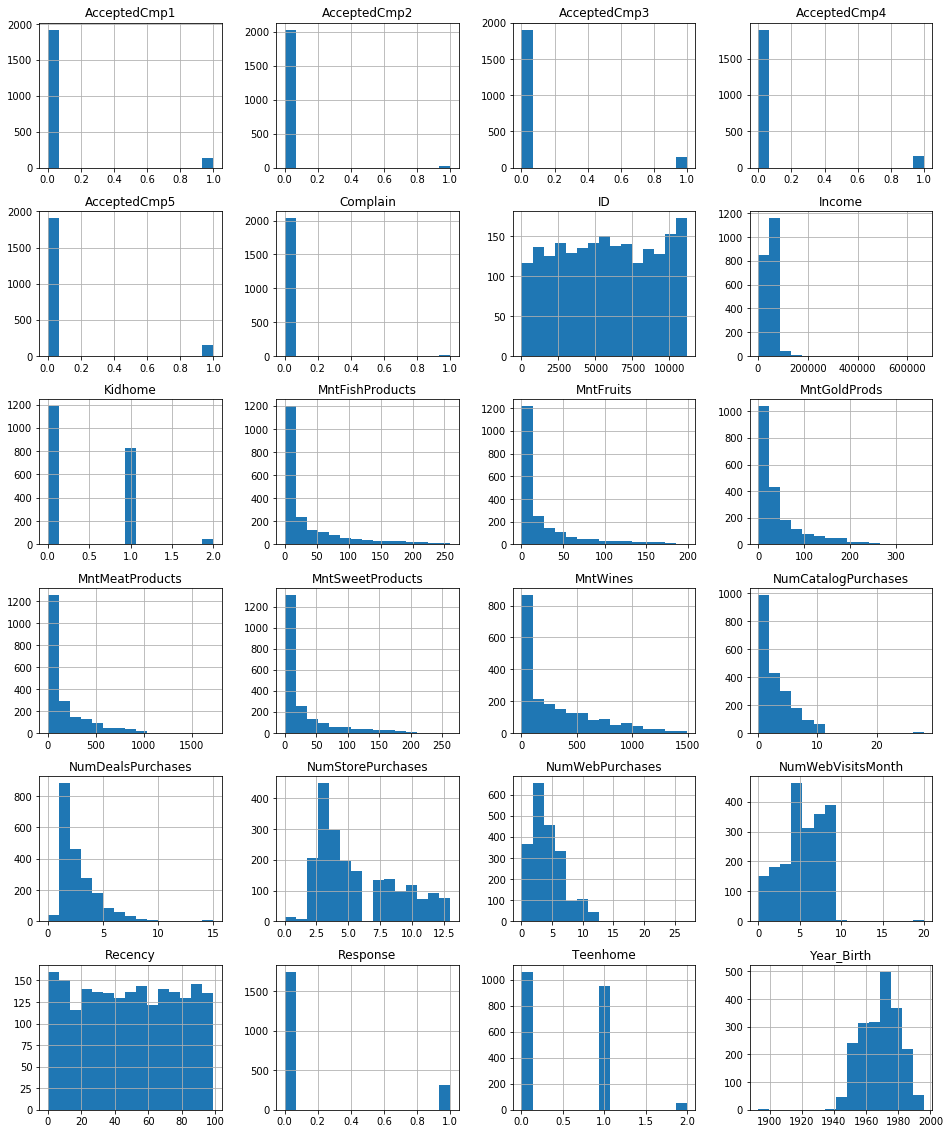

In [12]:
# Looking at the numérical data in histograms
data_num.hist(bins=15, figsize=(16, 20), layout=(6, 4));

# Categorical variables

In [13]:
# Statistics of the categorical variables
data_cat.describe()

,Education,Marital_Status,Dt_Customer
count,2058,2058,2058
unique,5,8,663
top,Graduation,Married,2014-05-12
freq,1030,795,10


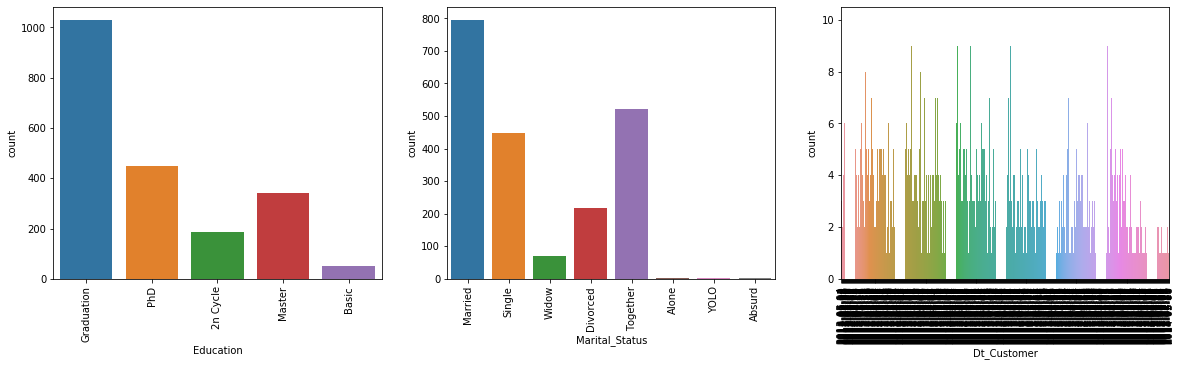

In [14]:
# Looking at the categorical data in barplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for var, subplot in zip(data_cat, ax.flatten()):
    sns.countplot(data_cat[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [15]:
# Some strange answers at 'Marital_status' have to be corrected: Alone (3x), Absurd (2x) and YOLO (2x)
# Most appropriate to replace these values with 'Single'
data_cat['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single', inplace=True)

In [16]:
# Also better to put 'Dt_Customer' in smaller bins (year and month)
data_cat['Dt_Customer'] = pd.to_datetime(data_cat['Dt_Customer']).dt.strftime('%Y%m')

In [17]:
data_cat.head()

,Education,Marital_Status,Dt_Customer
214,Graduation,Married,201305
822,Graduation,Single,201406
1654,PhD,Widow,201307
1906,PhD,Married,201309
491,Graduation,Divorced,201212


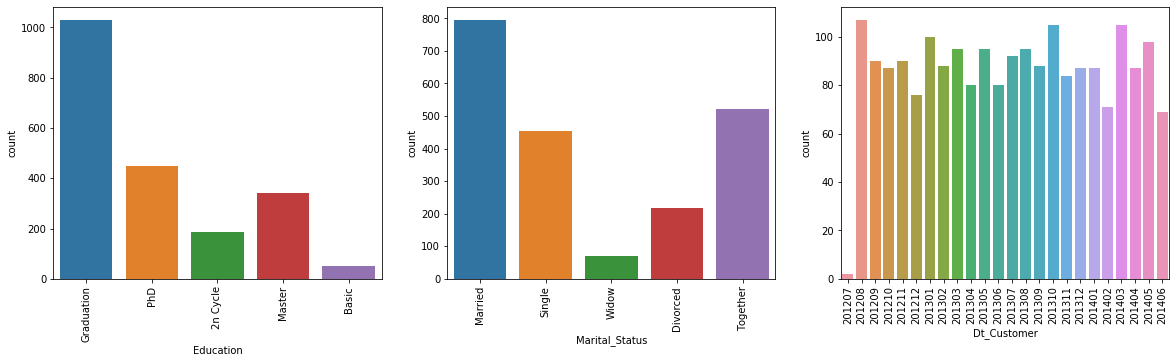

In [18]:
# Looking again at the categorical data in barplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for var, subplot in zip(data_cat, ax.flatten()):
    sns.countplot(data_cat[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [19]:
# Adding the numerical and catergorical columns to a combined data again
data_adj = pd.concat([data_num, data_cat],axis=1)
data_adj.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status,Dt_Customer
214,0,1985,70951.0,0,0,66,239,10,554,254,...,0,0,0,0,0,0,0,Graduation,Married,201305
822,1,1961,57091.0,0,0,0,464,5,64,7,...,0,0,0,0,1,0,1,Graduation,Single,201406
1654,13,1947,25358.0,0,1,57,19,0,5,0,...,0,0,0,0,0,0,0,PhD,Widow,201307
1906,17,1971,60491.0,0,1,81,637,47,237,12,...,0,0,0,0,0,0,0,PhD,Married,201309
491,22,1976,46310.0,1,0,99,185,2,88,15,...,0,0,0,0,0,0,0,Graduation,Divorced,201212


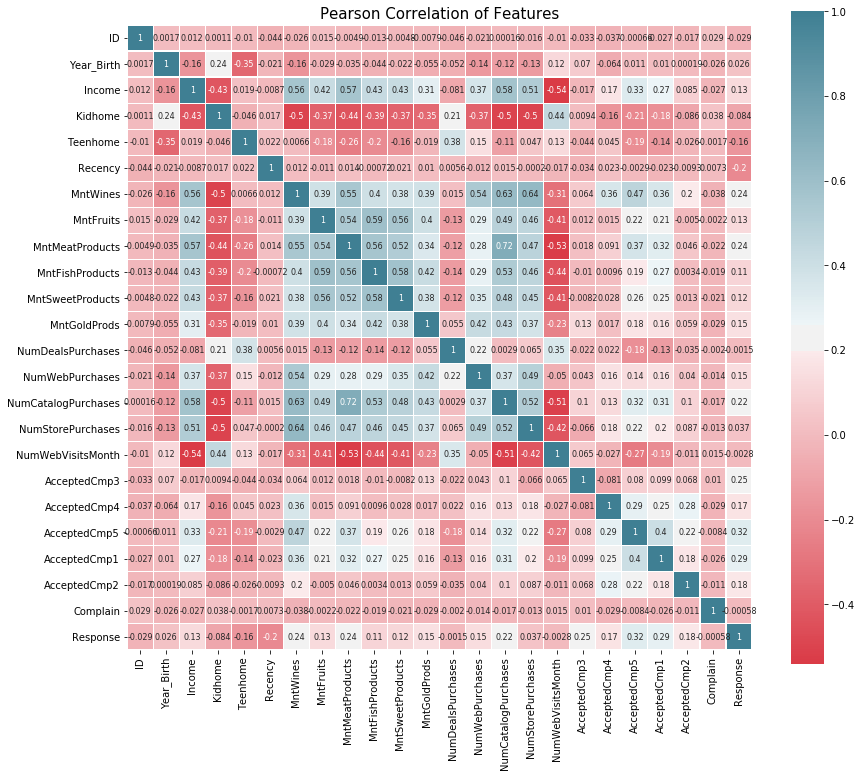

In [20]:
# Heatmap to show correlation between features
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data_adj.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':8})
plt.show()

# 2. Segmentation

The RFM (Recency, Frequency and Monetary) matrix principle is the best customer segmentation technique that uses past
purchase behavior to divide customers in groups.

In [21]:
# First lets take a look at the columns in the data
data_adj.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Education',
       'Marital_Status', 'Dt_Customer'],
      dtype='object')

In [22]:
# There already exists a 'Recency' variable, therefore we can start with the calculation of the 'Frequency' variable.
# It is calculated by summing up 3 'Num...Purchases' (left out NumDealsPurchases, since it is a subdivision of the purchases).
data_adj['Frequency'] = data_adj['NumWebPurchases']+\
                        data_adj['NumCatalogPurchases']+\
                        data_adj['NumStorePurchases']

In [23]:
# Now we have to create the 'Monetary' variable.
# It is the sum up of the 5 product categories: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts' and 'MntSweetProducts'.
# The 'MntFruits' shouldn´t be added, because it is a subdivision of the main category products.
data_adj['Monetary'] =  data_adj['MntWines']+\
                        data_adj['MntFruits']+\
                        data_adj['MntMeatProducts']+\
                        data_adj['MntFishProducts']+\
                        data_adj['MntSweetProducts']

In [24]:
# For the RFM segmentation analysis, we only need the columns 'ID', 'Recency', 'Frequency' and 'Monetary'
data_RFM = data_adj[['ID', 'Recency', 'Frequency', 'Monetary']]
data_RFM.head()

,ID,Recency,Frequency,Monetary
214,0,66,16,1144
822,1,0,17,540
1654,13,57,4,24
1906,17,81,24,952
491,22,99,12,295


In [25]:
# The lowest recency, highest frequency and monetary amounts are our best customers.
# The method 'qcut' can be used to divide the variables in quantiles.
data_RFM['R_quartile'] = pd.qcut(data_RFM['Recency'], 4, ['1','2','3','4'])
data_RFM['F_quartile'] = pd.qcut(data_RFM['Frequency'], 4, ['4','3','2','1'])
data_RFM['M_quartile'] = pd.qcut(data_RFM['Monetary'], 4, ['4','3','2','1'])
data_RFM.head()

,ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
214,0,66,16,1144,3,2,1
822,1,0,17,540,1,2,2
1654,13,57,4,24,3,4,4
1906,17,81,24,952,4,1,2
491,22,99,12,295,4,3,3


In [26]:
# Now just add a new column, which we will call 'RFM' with the quartiles combined
data_RFM['RFM'] = data_RFM.R_quartile.astype(str) + data_RFM.F_quartile.astype(str) + data_RFM.M_quartile.astype(str)
data_RFM.head()

,ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM
214,0,66,16,1144,3,2,1,321
822,1,0,17,540,1,2,2,122
1654,13,57,4,24,3,4,4,344
1906,17,81,24,952,4,1,2,412
491,22,99,12,295,4,3,3,433


In [27]:
print('RFM has',data_RFM['RFM'].nunique(),'unique values.')

RFM has 48 unique values.


In [28]:
# For simplicity, and because we have less data, we need to reduce the amount of unique values of the RFM.
# One way to do this is by calculating a score by summing up the quartiles.
data_RFM['Score'] = data_RFM.R_quartile.astype(int) + data_RFM.F_quartile.astype(int) + data_RFM.M_quartile.astype(int)
data_RFM.head()

,ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM,Score
214,0,66,16,1144,3,2,1,321,6
822,1,0,17,540,1,2,2,122,5
1654,13,57,4,24,3,4,4,344,11
1906,17,81,24,952,4,1,2,412,7
491,22,99,12,295,4,3,3,433,10


In [29]:
print('RFM Score has',data_RFM['Score'].nunique(),'unique values.')

RFM Score has 10 unique values.


In [30]:
# 10 unique values is still a lot for just over 2000 rows of the data.
# Let´s break it in three groups: 1) Best customers, 2) Average customers 3) Worst customers
def get_segment(data_RFM):
    if data_RFM['Score'] < 7:
        return 1 # Best customers
    elif data_RFM['Score'] > 9:
        return 3 # Worst customers
    else:
        return 2 # Average customers

In [31]:
# Apply the function above to get the three segments.
data_RFM['Segment'] = data_RFM.apply(get_segment, axis=1)
data_RFM.head()

,ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM,Score,Segment
214,0,66,16,1144,3,2,1,321,6,1
822,1,0,17,540,1,2,2,122,5,1
1654,13,57,4,24,3,4,4,344,11,3
1906,17,81,24,952,4,1,2,412,7,2
491,22,99,12,295,4,3,3,433,10,3


In [32]:
# Calculate average values for each Segment, and return a size of each of them
RFM_agg = data_RFM.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_agg)

        Recency Frequency Monetary      
           mean      mean     mean count
Segment                                 
1          38.7      19.7   1112.4   767
2          46.2      10.6    364.9   740
3          66.9       5.2     61.9   551


An interesting division found on the web (source: Blast Analytics Marketing)

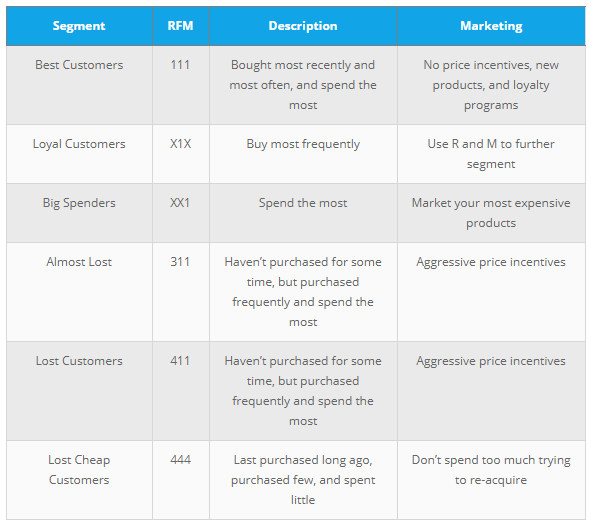
Segment 1: Best customers
    
    a. Most recently bought something
    b. They buy most frequently
    c. and they spend the most

Segment 2: Average customers
    
    a. It has been a bit longer, but still got potencial
    b. They buy with moderate frequency
    c. and they spend some good money
    
Segment 3: Worst customers
    
    a. It has been a while since the last time they bought something
    b. They don´t buy so frequently
    c. and they spend less money
    
Different suggested marketing strategies for each segment:

    1) Offer new products, since they are more certain to buy
    2) Customers with potencial. Maybe some aggressive price incentives will lure them back more frequently
    3) Don´t try too much

In [33]:
data_adj.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Education',
       'Marital_Status', 'Dt_Customer', 'Frequency', 'Monetary'],
      dtype='object')

In [34]:
df = data_adj[['ID','Year_Birth','Income','Kidhome','Teenhome','MntGoldProds','NumDealsPurchases',\
               'NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',\
               'AcceptedCmp5','Complain','Response','Education','Marital_Status','Dt_Customer']]
rfm = data_RFM[['Recency','Frequency','Monetary','Segment']]

In [35]:
df_total = pd.concat([df, rfm],axis=1)
df_total.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,...,AcceptedCmp5,Complain,Response,Education,Marital_Status,Dt_Customer,Recency,Frequency,Monetary,Segment
214,0,1985,70951.0,0,0,54,1,1,0,0,...,0,0,0,Graduation,Married,201305,66,16,1144,1
822,1,1961,57091.0,0,0,37,1,5,0,1,...,0,0,1,Graduation,Single,201406,0,17,540,1
1654,13,1947,25358.0,0,1,8,2,6,0,0,...,0,0,0,PhD,Widow,201307,57,4,24,3
1906,17,1971,60491.0,0,1,76,4,5,0,0,...,0,0,0,PhD,Married,201309,81,24,952,2
491,22,1976,46310.0,1,0,14,2,8,0,0,...,0,0,0,Graduation,Divorced,201212,99,12,295,3


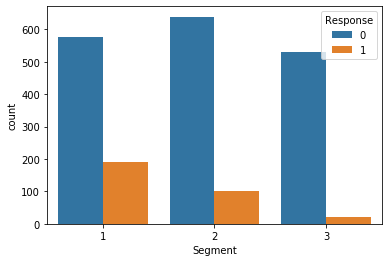

In [36]:
# This figure show the desired result, that the best segment (1) has the higher value of response
ax = sns.countplot(x='Segment', hue='Response', data=df_total)

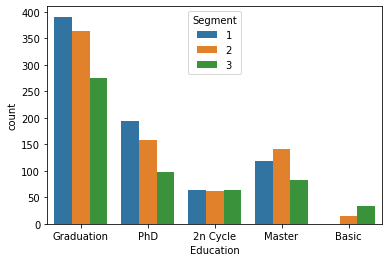

In [37]:
# Education by segment
ax = sns.countplot(x='Education', hue='Segment', data=df_total)

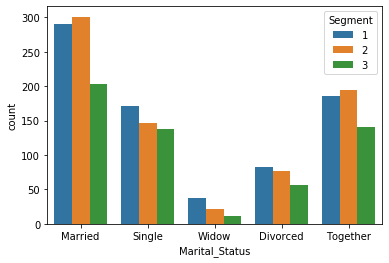

In [38]:
# Marital Status by segment
ax = sns.countplot(x='Marital_Status', hue='Segment', data=df_total)

In [39]:
df_sub = df_total[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebVisitsMonth','Complain', 'Response', 'Education', 'Marital_Status','Segment']]
df_sub.head()

,Year_Birth,Income,Kidhome,Teenhome,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Education,Marital_Status,Segment
214,1985,70951.0,0,0,54,1,1,0,0,Graduation,Married,1
822,1961,57091.0,0,0,37,1,5,0,1,Graduation,Single,1
1654,1947,25358.0,0,1,8,2,6,0,0,PhD,Widow,3
1906,1971,60491.0,0,1,76,4,5,0,0,PhD,Married,2
491,1976,46310.0,1,0,14,2,8,0,0,Graduation,Divorced,3


In [40]:
# Calculate average values for each Segment, and return a size of each of them
df_sub_agg = df_sub.groupby('Segment').agg({
    'Income': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean', 
    'MntGoldProds': 'mean',
    'NumDealsPurchases': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Response': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(df_sub_agg)

          Income Kidhome Teenhome MntGoldProds NumDealsPurchases  \
            mean    mean     mean         mean              mean   
Segment                                                            
1        69270.5     0.1      0.5         71.8               2.4   
2        48608.2     0.5      0.6         38.3               2.6   
3        33856.8     0.8      0.5         12.5               1.9   

        NumWebVisitsMonth Response        
                     mean     mean count  
Segment                                   
1                     4.2      0.2   767  
2                     5.7      0.1   740  
3                     6.4      0.0   551  


CONCLUSION:

    Our customers in segment 1 have, on average,
        a higher education,
        single, widowed or divorced,
        a higher income,
        less kids at home,
        tend to buy more of the Gold products,
        visit less the website and
        give a higher response!

# 3. Classification model

## Preparation for the classification model

In [41]:
# Adjust categorical feature 'Education' to be able to use in the ML model
data_edu = pd.get_dummies(df_total, columns=['Education'])
data_edu.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,...,Dt_Customer,Recency,Frequency,Monetary,Segment,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
214,0,1985,70951.0,0,0,54,1,1,0,0,...,201305,66,16,1144,1,0,0,1,0,0
822,1,1961,57091.0,0,0,37,1,5,0,1,...,201406,0,17,540,1,0,0,1,0,0
1654,13,1947,25358.0,0,1,8,2,6,0,0,...,201307,57,4,24,3,0,0,0,0,1
1906,17,1971,60491.0,0,1,76,4,5,0,0,...,201309,81,24,952,2,0,0,0,0,1
491,22,1976,46310.0,1,0,14,2,8,0,0,...,201212,99,12,295,3,0,0,1,0,0


In [42]:
# Adjust categorical feature 'Marital_Status' to be able to use in the ML model
data_final = pd.get_dummies(data_edu, columns=['Marital_Status'])
data_final.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
214,0,1985,70951.0,0,0,54,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
822,1,1961,57091.0,0,0,37,1,5,0,1,...,0,0,1,0,0,0,0,1,0,0
1654,13,1947,25358.0,0,1,8,2,6,0,0,...,0,0,0,0,1,0,0,0,0,1
1906,17,1971,60491.0,0,1,76,4,5,0,0,...,0,0,0,0,1,0,1,0,0,0
491,22,1976,46310.0,1,0,14,2,8,0,0,...,0,0,1,0,0,1,0,0,0,0


In [43]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_final)

# Statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,...,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03
mean,1.410167e-16,-1.333131e-15,-1.130183e-16,1.549889e-16,1.302273e-16,3.231407e-17,-4.634021e-17,-8.828377e-17,-7.228857e-17,6.321204e-17,...,1.148525e-16,-1.481916e-16,3.453668e-16,5.573233e-16,1.144749e-16,-4.251000e-17,3.398642e-17,1.375641e-16,3.090067e-16,5.133028e-17
std,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,...,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00
min,-1.775424e+00,-6.330904e+00,-1.995344e+00,-8.290973e-01,-9.320509e-01,-8.418704e-01,-1.204219e+00,-2.180830e+00,-2.649581e-01,-1.131162e-01,...,-3.170722e-01,-1.561738e-01,-1.000972e+00,-4.456481e-01,-5.290092e-01,-3.424381e-01,-7.933812e-01,-5.327690e-01,-5.822130e-01,-1.890298e-01
25%,-8.640837e-01,-8.175743e-01,-6.564912e-01,-8.290973e-01,-9.320509e-01,-6.691719e-01,-6.894114e-01,-9.509756e-01,-2.649581e-01,-1.131162e-01,...,-3.170722e-01,-1.561738e-01,-1.000972e+00,-4.456481e-01,-5.290092e-01,-3.424381e-01,-7.933812e-01,-5.327690e-01,-5.822130e-01,-1.890298e-01
50%,-8.186202e-03,1.013139e-01,-3.135913e-02,-8.290973e-01,-9.320509e-01,-3.813410e-01,-1.746042e-01,2.788785e-01,-2.649581e-01,-1.131162e-01,...,-3.170722e-01,-1.561738e-01,9.990287e-01,-4.456481e-01,-5.290092e-01,-3.424381e-01,-7.933812e-01,-5.327690e-01,-5.822130e-01,-1.890298e-01
75%,8.811310e-01,6.860610e-01,6.259645e-01,1.031625e+00,8.982552e-01,2.326983e-01,3.402030e-01,6.888298e-01,-2.649581e-01,-1.131162e-01,...,-3.170722e-01,-1.561738e-01,9.990287e-01,-4.456481e-01,-5.290092e-01,-3.424381e-01,1.260428e+00,-5.327690e-01,1.717584e+00,-1.890298e-01
max,1.671575e+00,2.273232e+00,2.421029e+01,2.892347e+00,2.728561e+00,6.104449e+00,6.517889e+00,6.018197e+00,3.774181e+00,8.840466e+00,...,3.153856e+00,6.403124e+00,9.990287e-01,2.243923e+00,1.890326e+00,2.920236e+00,1.260428e+00,1.876986e+00,1.717584e+00,5.290172e+00


In [48]:
# Organize the data
target = data_final['Segment']
features = data_final.drop(data_final[['Segment','ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',\
                                       'AcceptedCmp4','AcceptedCmp5']], axis = 1)

In [50]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=0)

In [72]:
# Estimate the K-nearest neighbor model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.6621359223300971

Final result:
    
    The model will classify with about 66% certainty the customers within the three groups.